In [1]:
import numpy as np
import xarray as xr
from scipy.optimize import curve_fit

In [2]:
def powerfunc(x,p1,p2):
    y = p1 * x ** p2
    return y

In [3]:
diameters = np.arange(50)*2
n_diams = len(diameters)

diameters_xr = xr.DataArray(diameters, dims='dbh', coords={'dbh':diameters})

In [4]:
### heights of trees at barro colorado island, panama

p1_martinezcano = 57.6
p2_martinezcano = 0.74
p3_martinezcano = 21.6
heights_martinezcano = (p1_martinezcano*diameters_xr**p2_martinezcano)/(p3_martinezcano+diameters_xr**p2_martinezcano)

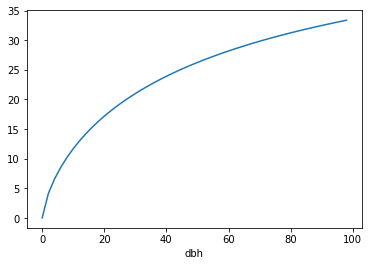

In [5]:
heights_martinezcano.plot()

In [6]:
p1_chaveagb = 0.0673
p2_chaveagb = 0.976
wood_density = 0.6
c2b = 0.5

bagw_chave   = (p1_chaveagb * (wood_density*diameters_xr**2.0*heights_martinezcano)**p2_chaveagb)/c2b


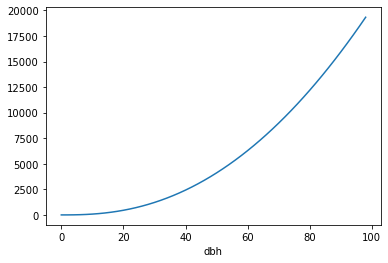

In [7]:
bagw_chave.plot()

In [8]:
popt, pcov = curve_fit(powerfunc, diameters_xr, bagw_chave)

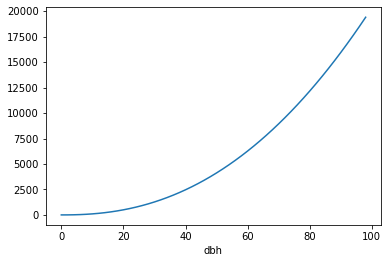

In [9]:
bagw_powerlaw = popt[0] * diameters_xr ** popt[1]
bagw_powerlaw.plot()

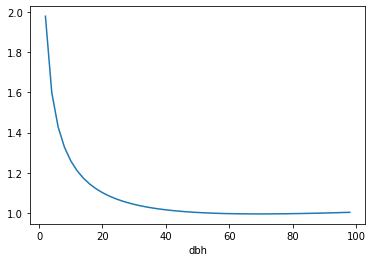

In [10]:
(bagw_powerlaw/bagw_chave).plot()